<a href="https://colab.research.google.com/github/babatundeibukun/DEEP-LEARNING-PROJECT---COMPUTER/blob/main/customer_prediction_rate_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [101]:
df = pd.read_csv('/content/customer_churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [102]:
df.shape

(7043, 21)

In [103]:
df.drop('customerID', axis = 1, inplace = True)

In [104]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [105]:
df.isna().any()

,0
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False
OnlineBackup,False


In [106]:
df.isnull().any()

,0
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False
OnlineBackup,False


In [107]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [108]:
#the totalcharges column is object and thats weird , right.

df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [110]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])


ValueError: Unable to parse string " " at position 488

In [111]:
#the above is  working because , there are columns with just strings and this is how we solve it
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')
df['TotalCharges'].values


array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [112]:
df['TotalCharges'].isnull()

,TotalCharges
0,False
1,False
2,False
3,False
4,False
...,...
7038,False
7039,False
7040,False
7041,False


In [113]:
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [114]:
df[df['TotalCharges'].isnull()].shape

(11, 20)

In [115]:
df.iloc[488]

,488
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,Yes
tenure,0
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,Yes
OnlineBackup,No


In [116]:
df.iloc[488]['TotalCharges']

nan

In [117]:
df1= df[df['TotalCharges'].notna()]
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [118]:
df1.TotalCharges.isnull().any()

False

In [119]:
df1['TotalCharges'].values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [120]:
df1.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [121]:
df1.isna().any()

,0
gender,False
SeniorCitizen,False
Partner,False
Dependents,False
tenure,False
PhoneService,False
MultipleLines,False
InternetService,False
OnlineSecurity,False
OnlineBackup,False


In [122]:
df1.shape

(7032, 20)

#Visualizations

In [123]:
df1[df1['Churn'] == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [124]:
tenure_churn_no = df1[df1['Churn'] == 'No'].tenure
tenure_churn_yes = df1[df1['Churn'] == 'Yes'].tenure

In [125]:
tenure_churn_no

,tenure
0,1
1,34
3,45
6,22
7,10
...,...
7037,72
7038,24
7039,72
7040,11


Text(0, 0.5, 'churn')

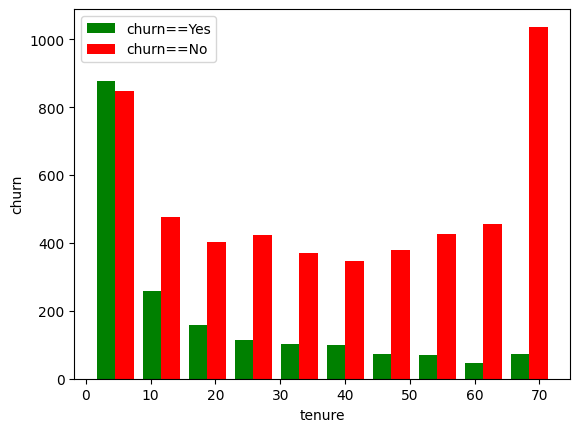

In [126]:
plt.hist([tenure_churn_yes, tenure_churn_no], color = ['green', 'red'], label = ['churn==Yes', 'churn==No'])
plt.legend()
plt.xlabel('tenure')
plt.ylabel('churn')

I want to see if clients with high monthly charges are leaving more

In [127]:
mc_churn_no = df1[df1['Churn'] == 'No'].MonthlyCharges
mc_churn_yes = df1[df1['Churn'] == 'Yes'].MonthlyCharges

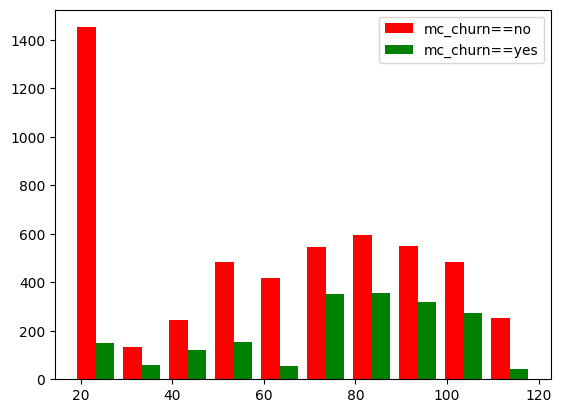

In [128]:
plt.hist([mc_churn_no, mc_churn_yes], color =['red', 'green'], label = ['mc_churn==no', 'mc_churn==yes'])
plt.legend()

In [129]:
for columns in df :
  print(f' {columns} : {df[columns].unique()}')

 gender : ['Female' 'Male']
 SeniorCitizen : [0 1]
 Partner : ['Yes' 'No']
 Dependents : ['No' 'Yes']
 tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
 PhoneService : ['No' 'Yes']
 MultipleLines : ['No phone service' 'No' 'Yes']
 InternetService : ['DSL' 'Fiber optic' 'No']
 OnlineSecurity : ['No' 'Yes' 'No internet service']
 OnlineBackup : ['Yes' 'No' 'No internet service']
 DeviceProtection : ['No' 'Yes' 'No internet service']
 TechSupport : ['No' 'Yes' 'No internet service']
 StreamingTV : ['No' 'Yes' 'No internet service']
 StreamingMovies : ['No' 'Yes' 'No internet service']
 Contract : ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling : ['Yes' 'No']
 PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 MonthlyCharges : [29.85 56.95 53

In [130]:
df.gender.unique()

array(['Female', 'Male'], dtype=object)

In [131]:
df.gender.dtypes

dtype('O')

In [132]:
def print_unique_values_in_columns(df):
  for columns in df1 :
    if df1[columns].dtypes == 'object' :
      print(f' {columns} : {df1[columns].unique()}')

print_unique_values_in_columns(df1)

 gender : ['Female' 'Male']
 Partner : ['Yes' 'No']
 Dependents : ['No' 'Yes']
 PhoneService : ['No' 'Yes']
 MultipleLines : ['No phone service' 'No' 'Yes']
 InternetService : ['DSL' 'Fiber optic' 'No']
 OnlineSecurity : ['No' 'Yes' 'No internet service']
 OnlineBackup : ['Yes' 'No' 'No internet service']
 DeviceProtection : ['No' 'Yes' 'No internet service']
 TechSupport : ['No' 'Yes' 'No internet service']
 StreamingTV : ['No' 'Yes' 'No internet service']
 StreamingMovies : ['No' 'Yes' 'No internet service']
 Contract : ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling : ['Yes' 'No']
 PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn : ['No' 'Yes']


Some of the columns have no internet service or no phone service, that can be replaced with a simple No



In [133]:
df1.replace('No internet service', 'No' , inplace = True)
df1.replace('No phone service', 'No' , inplace = True)


<ipython-input-133-640707e6e73f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service', 'No' , inplace = True)
<ipython-input-133-640707e6e73f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service', 'No' , inplace = True)


In [134]:
print_unique_values_in_columns(df1)

 gender : ['Female' 'Male']
 Partner : ['Yes' 'No']
 Dependents : ['No' 'Yes']
 PhoneService : ['No' 'Yes']
 MultipleLines : ['No' 'Yes']
 InternetService : ['DSL' 'Fiber optic' 'No']
 OnlineSecurity : ['No' 'Yes']
 OnlineBackup : ['Yes' 'No']
 DeviceProtection : ['No' 'Yes']
 TechSupport : ['No' 'Yes']
 StreamingTV : ['No' 'Yes']
 StreamingMovies : ['No' 'Yes']
 Contract : ['Month-to-month' 'One year' 'Two year']
 PaperlessBilling : ['Yes' 'No']
 PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 Churn : ['No' 'Yes']


Convert Yes and No to 1 or 0



In [135]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for columns in  yes_no_columns:
  df1[columns].replace({'Yes': 1, 'No': 0}, inplace = True)

<ipython-input-135-26e73a4f8b26>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[columns].replace({'Yes': 1, 'No': 0}, inplace = True)
<ipython-input-135-26e73a4f8b26>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[columns].replace({'Yes': 1, 'No': 0}, inplace = True)
<ipython-input-135-2

In [136]:
print_unique_values_in_columns(df1)

 gender : ['Female' 'Male']
 InternetService : ['DSL' 'Fiber optic' 'No']
 Contract : ['Month-to-month' 'One year' 'Two year']
 PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [141]:
for columns in df1:
  print(f'{columns} : {df1[columns].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [142]:
#create a dummy variable for the gender columns

df1['gender']. replace({'Female' : 1, 'Male' : 0}, inplace = True)




<ipython-input-142-f9b988d25ef0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender']. replace({'Female' : 1, 'Male' : 0}, inplace = True)
<ipython-input-142-f9b988d25ef0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender']. replace({'Female' : 1, 'Male' : 0}, inplace = True)
<i

In [146]:
for columns in df1 :
  print(f'{columns} : {df1[columns].unique()}')

gender : [1 0]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [153]:
#create a dummy variable for the rest of the variables that isnt float or integers

df2 = pd.get_dummies(df1, columns = ['InternetService','Contract','PaymentMethod'], drop_first = True, dtype = int)

In [154]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4299,1,1,0,0,29,1,1,1,1,0,...,58.55,1718.95,0,0,0,0,0,0,0,0
1665,1,0,0,0,9,1,1,0,0,0,...,76.85,663.55,0,1,0,0,0,0,1,0
5001,0,0,0,0,19,1,0,0,0,1,...,55.00,1046.50,1,0,0,0,0,1,0,0
4601,0,0,0,0,45,1,1,0,0,1,...,103.65,4747.85,0,1,0,0,0,0,0,0
2132,0,0,1,1,23,1,0,0,0,0,...,19.65,436.90,0,0,1,1,0,0,0,1


In [155]:
df2.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
OnlineSecurity,int64
OnlineBackup,int64
DeviceProtection,int64


In [156]:
for columns in df2 :
  print( f'{columns} : {df2[columns]}')

gender : 0       1
1       0
2       0
3       0
4       1
       ..
7038    0
7039    1
7040    1
7041    0
7042    0
Name: gender, Length: 7032, dtype: int64
SeniorCitizen : 0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7032, dtype: int64
Partner : 0       1
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    1
7042    0
Name: Partner, Length: 7032, dtype: int64
Dependents : 0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    0
Name: Dependents, Length: 7032, dtype: int64
tenure : 0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7032, dtype: int64
PhoneService : 0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7041    1
7042    1
Name: PhoneService, Length: 7032, dtype:

In [157]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [162]:
from sklearn.preprocessing import MinMaxScaler

In [165]:
cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
sx = MinMaxScaler()
df2[cols] = sx.fit_transform(df2[cols])

In [167]:
df2['MonthlyCharges'].values

array([0.11542289, 0.38507463, 0.35422886, ..., 0.11293532, 0.55870647,
       0.86965174])

In [169]:
X = df2.drop('Churn', axis = 1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaperlessBilling,MonthlyCharges,TotalCharges,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0.115423,0.001275,0,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,0.385075,0.215867,0,0,1,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0.354229,0.010310,0,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,0.239303,0.210241,0,0,1,0,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,1,0.521891,0.015330,1,0,0,0,0,1,0


In [172]:
y = df2['Churn']
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [173]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train,  y_test = train_test_split( X , y , test_size = 0.2, random_state= 2345 )

In [178]:
X_train.shape

(5625, 23)

In [177]:
X_test.shape

(1407, 23)

In [179]:
df2['Churn'].value_counts()

,count
Churn,
0,5163
1,1869


In [180]:
len(X_train.columns)

23

Building our deep learning model

In [186]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(20, input_shape=(23,) , activation = 'relu'),
    keras.layers.Dense(2000 , activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])


model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

model.fit(X_train, y_train, epochs = 50)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7546 - loss: 0.5188
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7871 - loss: 0.4387
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7878 - loss: 0.4302
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7986 - loss: 0.4290
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7942 - loss: 0.4319
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7982 - loss: 0.4296
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8073 - loss: 0.4194
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8013 - loss: 0.4133
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8116 - loss: 0.3982
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8041 - loss: 0.4028
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8040 - loss: 0.4066
Epoch 12/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

In [187]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7506 - loss: 0.5525


[0.5421395301818848, 0.7732764482498169]

In [188]:
y_predicted = model.predict(X_test)
y_predicted[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[0.11874925],
       [0.51453435],
       [0.24019696],
       [0.2013756 ],
       [0.58039933]], dtype=float32)

In [189]:
y_test[:5]

,Churn
354,1
6347,0
284,1
124,0
4692,0


In [191]:
y_pred = []

for i in y_predicted:
  if i > 0.5 :
    y_pred.append(1)
  else :
    y_pred.append(0)

In [193]:
y_pred[:10]

[0, 1, 0, 0, 1, 1, 0, 0, 0, 0]

In [194]:
y_test[:10]

,Churn
354,1
6347,0
284,1
124,0
4692,0
2702,0
6225,0
6446,0
3371,1
2127,1


In [195]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1047
           1       0.56      0.53      0.55       360

    accuracy                           0.77      1407
   macro avg       0.70      0.69      0.70      1407
weighted avg       0.77      0.77      0.77      1407



Text(95.72222222222221, 0.5, 'Truth')

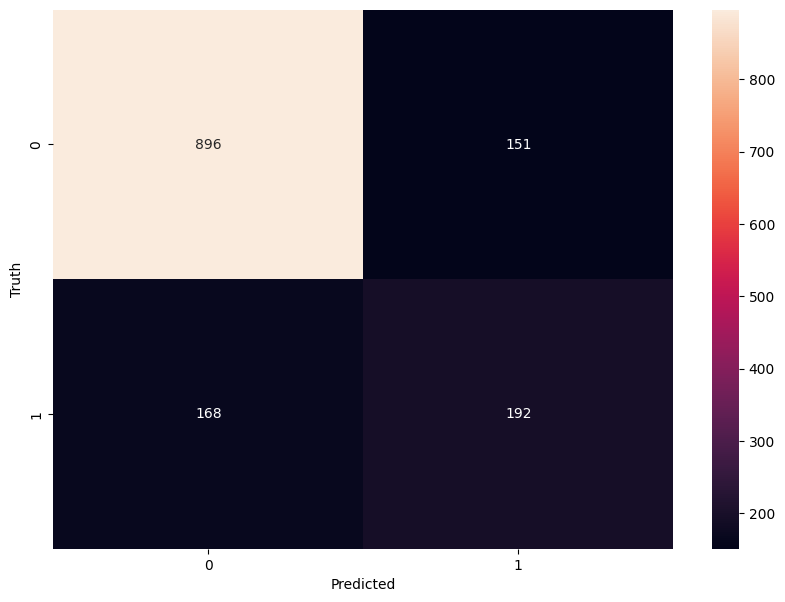

In [196]:

import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')